<a href="https://colab.research.google.com/github/cabb1808/ProyectoSenales3/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA


In [98]:
!wget 'https://raw.githubusercontent.com/cabb1808/ProyectoSenales3/main/TRM.csv' -O 'TRM.csv'

--2023-06-03 18:33:06--  https://raw.githubusercontent.com/cabb1808/ProyectoSenales3/main/TRM.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220043 (215K) [text/plain]
Saving to: ‘TRM.csv’

TRM.csv             100%[===================>] 214.89K  --.-KB/s    in 0.03s   

2023-06-03 18:33:07 (7.59 MB/s) - ‘TRM.csv’ saved [220043/220043]



In [99]:
#Importamos la database y ordenamos en orden cronologico ya que no lo está

data = pd.read_csv('TRM.csv')
# Convertir la columna de fechas al formato de fecha adecuado
data['VIGENCIADESDE'] = pd.to_datetime(data['VIGENCIADESDE'], format='%d/%m/%Y')

# Ordenar los datos por fecha
data.sort_values(by='VIGENCIADESDE', inplace=True)
datos = data[['VIGENCIADESDE', 'VALOR']]

print(datos)

     VIGENCIADESDE    VALOR
376     1991-12-02   643.42
377     1991-12-03   639.22
378     1991-12-04   635.70
6187    1991-12-05   631.51
6188    1991-12-06   627.16
...            ...      ...
7363    2022-07-14  4558.05
7364    2022-07-15  4519.65
7365    2022-07-16  4395.63
7366    2022-07-19  4315.41
7367    2022-07-20  4303.34

[7368 rows x 2 columns]


(5157, 1)


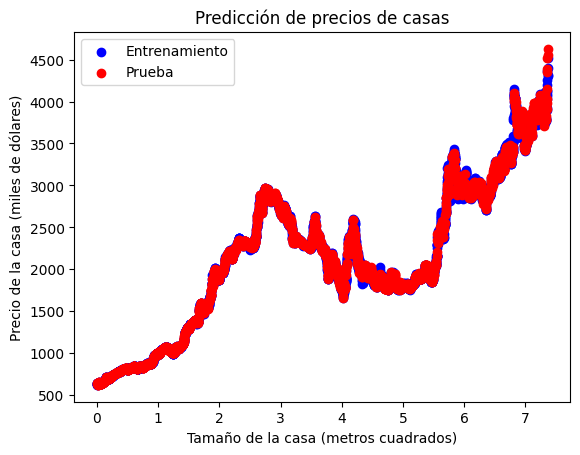

In [105]:
#Creamos un vector temporal y separamos los datos en train y test


x = np.arange(0, 7368/1000, 0.001)
X_train, X_test, y_train, y_test = train_test_split(x, datos['VALOR'], test_size=0.3, random_state=42)
X_train=X_train.reshape(-1, 1)
X_test=X_test.reshape(-1, 1)


plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_test, y_test, color='red', label='Prueba')
plt.xlabel('Tamaño de la casa (metros cuadrados)')
plt.ylabel('Precio de la casa (miles de dólares)')
plt.title('Predicción de precios de casas')
plt.legend()


In [ ]:
def expo_carac(X, K):
    # Extraer caracteristicas exponenciales
    # X: N x D, vector de entradas 
    # K: escalar, grado del polinomio
    # return: N x (K+1), matriz de características Phi 
    
    X = X.flatten()
    N = X.shape[0]
    
    #inicializar Phi
    Phi = np.ones((N, K+1))
    mu = np.linspace(0,10,K)
    sig2 = 0.1

    # Calcular matriz Phi
    for k in range(1, K+1):
        Phi[:,k] = np.exp(-(mu[k-1] - X)**2/sig2) 
    return Phi

In [107]:
# Aplicar PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
model = LinearRegression()

# Entrenar el modelo con los datos transformados
model.fit(X_train_pca, y_train)

# Aplicar PCA a los datos de prueba
X_test_pca = pca.transform(X_test)

# Realizar la predicción
y_pred = model.predict(X_test_pca)

